In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('TPS1_2_w_Areasv2.csv')

In [3]:
df1['Level_2'] = 1

In [4]:
df2 = pd.read_csv('TPS1_3_w_Areasv2.csv')

C:\Users\ssq10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df2['Level_2'] = 0

In [6]:
df_comb = pd.DataFrame()
df_comb = df1.append(df2)

In [7]:
df1.shape

(378330, 10)

In [8]:
df2.shape

(248695, 10)

In [9]:
df_comb.shape

(627025, 10)

In [10]:
df_ap = pd.read_csv('cleaned_flight_datav2.csv')

In [11]:
df_ap.head()

,Unnamed: 0,Airline,Departure,Canceled,Domestic,Delay,Sched_Time
0,15,UAL,0,0,0,0.0,2019-08-01 10:15:00
1,17,GLO,0,0,1,0.0,2019-08-01 03:05:00
2,19,GLO,0,0,1,0.0,2019-08-01 02:05:00
3,26,TAM,0,0,1,1435.0,2019-08-01 01:20:00
4,27,DAL,0,0,0,0.0,2019-08-01 10:00:00


In [12]:
df_ap['localtime'] = pd.to_datetime(df_ap['Sched_Time'])
df_ap.drop(columns = ['Sched_Time'], inplace=True)

In [13]:
df_ap['International'] = 0
df_ap.loc[df_ap['Domestic'] == 0, 'International'] = 1

In [14]:
df_ap['Arrival'] = 0
df_ap.loc[df_ap['Departure'] == 0, 'Arrival'] = 1

In [15]:
df_ap.Airline.nunique()

35

In [16]:
df_ap.head()

,Unnamed: 0,Airline,Departure,Canceled,Domestic,Delay,localtime,International,Arrival
0,15,UAL,0,0,0,0.0,2019-08-01 10:15:00,1,1
1,17,GLO,0,0,1,0.0,2019-08-01 03:05:00,0,1
2,19,GLO,0,0,1,0.0,2019-08-01 02:05:00,0,1
3,26,TAM,0,0,1,1435.0,2019-08-01 01:20:00,0,1
4,27,DAL,0,0,0,0.0,2019-08-01 10:00:00,1,1


In [17]:
df_ap2 = df_ap.drop(columns = ['Unnamed: 0']) #, 'Airline'

In [18]:
df_ap2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42932 entries, 0 to 42931
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Airline        42932 non-null  object        
 1   Departure      42932 non-null  int64         
 2   Canceled       42932 non-null  int64         
 3   Domestic       42932 non-null  int64         
 4   Delay          42620 non-null  float64       
 5   localtime      42932 non-null  datetime64[ns]
 6   International  42932 non-null  int64         
 7   Arrival        42932 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.6+ MB


In [19]:
df_agg =  pd.DataFrame(
    df_ap2.groupby([pd.Grouper(freq='1H',
                               key='localtime')]).agg({'Departure': ['sum'],
                                                        'Arrival': ['sum'],
                                                        'Canceled': ['sum'],
                                                        'Delay': ['mean'],
                                                        'Domestic': ['sum'],
                                                        'International': ['sum'],
                                                       })).reset_index()

In [20]:
df_agg.columns = [a_tuple[0] for a_tuple in df_agg.columns] # Flattens the column headers

In [21]:
df_agg['Month'] = df_agg['localtime'].dt.strftime('%m')
df_agg['Date'] = df_agg['localtime'].dt.strftime('%d')
df_agg['Day'] = df_agg['localtime'].dt.dayofweek
df_agg['Hour'] = df_agg['localtime'].dt.strftime('%H')

In [22]:
len(df_agg)

3682

In [23]:
df_comb['localtime'] = pd.to_datetime(df_comb['localtime'], utc=True)

In [24]:
# Convert From UTC
df_comb['localtime'] +=  pd.to_timedelta(-3, unit='h')

In [25]:
df_comb['Month'] = df_comb['localtime'].dt.strftime('%m')
df_comb['Date'] = df_comb['localtime'].dt.strftime('%d')
df_comb['Day'] = df_comb['localtime'].dt.dayofweek
df_comb['Hour'] = df_comb['localtime'].dt.strftime('%H')

In [26]:
df_comb.loc[df_comb.ClientMacAddr == max(df_comb.ClientMacAddr)]

,Unnamed: 0,localtime,Unique_Grid,Area_Ctgry,Area_Name,X_Grid,Y_Grid,ClientMacAddr,TIG,Level_2,Month,Date,Day,Hour
47919,47919,2019-08-12 08:00:00+00:00,3642.0,Restroom,Rest_Rm 1,36.0,42.0,166.0,973.639932,1,08,12,0,08


In [27]:
len(df_comb)

627025

In [28]:
df_cln = df_comb.drop(columns = ['localtime', 'Area_Ctgry', 'Area_Name','Unique_Grid','Unnamed: 0'])

In [29]:
df_mod = pd.merge(df_cln, df_agg, on = ['Month','Date','Day','Hour'])

In [30]:
len(df_mod)

627024

In [31]:
df_mod.Delay = df_mod.Delay.fillna(0)

In [32]:
df_mod.loc[df_mod.ClientMacAddr == max(df_mod.ClientMacAddr)]

,X_Grid,Y_Grid,ClientMacAddr,TIG,Level_2,Month,Date,Day,Hour,localtime,Departure,Arrival,Canceled,Delay,Domestic,International
105059,36.0,42.0,166.0,973.639932,1,08,12,0,08,2019-08-12 08:00:00,8,2,0,1290.1,9,1


In [33]:
df_sys =  pd.DataFrame(
    df_mod.groupby(['Month', 'Date', 'Hour']).agg({'ClientMacAddr': ['sum'],
                                                        'TIG': ['mean']
                                                       })).reset_index()
df_sys.columns = [a_tuple[0] for a_tuple in df_sys.columns] # Flattens the column headers
df_sys.columns = ['Month','Date','Hour','Num_in_Sys','Mean_TIG']

In [34]:
df_sys.Num_in_Sys = df_sys.Num_in_Sys.shift(periods=1)
df_sys.Mean_TIG = df_sys.Mean_TIG.shift(periods=1)

In [35]:
print(len(df_mod), len(df_sys))

627024 3418


In [36]:
df_mod_comb = pd.merge(df_mod, df_sys, on=['Month','Date','Hour'])

In [37]:
len(df_mod_comb)

627024

In [38]:
len(df_mod_comb.loc[df_mod_comb.Num_in_Sys.isna()])

370

In [39]:
df_mod_comb = df_mod_comb.sort_values(['X_Grid','Y_Grid','Level_2','Month','Date', 'Hour'])

In [40]:
df_mod_comb['Month'] = df_mod_comb['Month'].astype(int).astype(str).str.zfill(2)
df_mod_comb['Date'] = df_mod_comb['Date'].astype(int).astype(str).str.zfill(2)
df_mod_comb['Hour'] = df_mod_comb['Hour'].astype(int)
df_mod_comb['X_Grid'] = df_mod_comb['X_Grid'].astype(int).astype(str).str.zfill(2)
df_mod_comb['Y_Grid'] = df_mod_comb['Y_Grid'].astype(int).astype(str).str.zfill(2)

In [41]:
df_mod_comb.head()

,X_Grid,Y_Grid,ClientMacAddr,TIG,Level_2,Month,Date,Day,Hour,localtime,Departure,Arrival,Canceled,Delay,Domestic,International,Num_in_Sys,Mean_TIG
44936,08,15,1.0,0.0,0,08,05,0,14,2019-08-05 14:00:00,5,2,0,205.285714,5,2,3014.0,387.795107
54792,08,16,1.0,0.0,0,08,06,1,14,2019-08-06 14:00:00,6,2,0,897.375000,6,2,5061.0,467.871104
80604,08,16,1.0,0.0,0,08,09,4,9,2019-08-09 09:00:00,4,2,0,1431.500000,4,2,3182.0,379.325367
19447,08,18,1.0,0.0,0,08,02,4,15,2019-08-02 15:00:00,4,5,0,0.666667,6,3,3476.0,359.028737
61002,08,18,1.0,0.0,0,08,07,2,5,2019-08-07 05:00:00,4,5,2,820.571429,3,6,2653.0,332.969954


In [42]:
tot_TIG = []
tot_num = []
cma_lst = df_mod_comb.ClientMacAddr
tig_lst = df_mod_comb.TIG
da_lst = df_mod_comb.Date
mo_lst = df_mod_comb.Month
hr_lst = df_mod_comb.Hour
x_lst = df_mod_comb.X_Grid
y_lst = df_mod_comb.Y_Grid

for i in range(0,len(df_mod_comb)):
    cur_CMA = cma_lst[i]
    cur_TIG = tig_lst[i]
    cur_mo = mo_lst[i]
    cur_da = da_lst[i]
    cur_hr = hr_lst[i]
    cur_x = x_lst[i]
    cur_y = y_lst[i]

    if i >= 1:
        j = i-1
        prev_CMA = cma_lst[j]
        prev_TIG = tig_lst[j]
        prev_x = x_lst[j]
        prev_y = y_lst[j]
        prev_hr = hr_lst[j]

        if (cur_hr == prev_hr + 1) & \
        (cur_x == prev_x) & (cur_y == prev_y):
            tot_TIG.append(prev_TIG)
            tot_num.append(prev_CMA)

        elif (cur_hr == 0) & (prev_hr == 23) & \
        (cur_x == prev_x) & (cur_y == prev_y):
            tot_TIG.append(prev_TIG)
            tot_num.append(prev_CMA)

        else:
            tot_TIG.append(0)
            tot_num.append(0)

    else:
        tot_TIG.append(0)
        tot_num.append(0)

In [43]:
df_mod_comb['Prev_TIG'] = tot_TIG
df_mod_comb['Prev_Mac'] = tot_num
df_mod_comb['Hour'] = df_mod_comb['Hour'].astype(str).str.zfill(2)
df_mod_comb['Day'] = df_mod_comb['Day'].astype(str).str.zfill(2)
df_mod_comb.head()

,X_Grid,Y_Grid,ClientMacAddr,TIG,Level_2,Month,Date,Day,Hour,localtime,Departure,Arrival,Canceled,Delay,Domestic,International,Num_in_Sys,Mean_TIG,Prev_TIG,Prev_Mac
44936,08,15,1.0,0.0,0,08,05,00,14,2019-08-05 14:00:00,5,2,0,205.285714,5,2,3014.0,387.795107,0,0
54792,08,16,1.0,0.0,0,08,06,01,14,2019-08-06 14:00:00,6,2,0,897.375000,6,2,5061.0,467.871104,0,0
80604,08,16,1.0,0.0,0,08,09,04,09,2019-08-09 09:00:00,4,2,0,1431.500000,4,2,3182.0,379.325367,0,0
19447,08,18,1.0,0.0,0,08,02,04,15,2019-08-02 15:00:00,4,5,0,0.666667,6,3,3476.0,359.028737,0,0
61002,08,18,1.0,0.0,0,08,07,02,05,2019-08-07 05:00:00,4,5,2,820.571429,3,6,2653.0,332.969954,0,0


In [44]:
print(len(df_mod_comb), max(df_mod_comb.ClientMacAddr))


627024 166.0


In [45]:
len(df_mod_comb.loc[df_mod_comb.Num_in_Sys.notna()])

626654

In [46]:
#dummy1 = pd.get_dummies(df_mod_comb['Day'])
#dummy2 = pd.get_dummies(df_mod_comb['Hour'])
#df_mod_comb.drop(columns=['Day','Hour'], inplace=True)
#df_mod_comb = pd.concat([df_mod_comb,dummy1,dummy2], axis=1)

In [47]:
df_mod1 = df_mod_comb[(df_mod_comb.Month == '09') & (df_mod_comb.Date == '01')]
df_mod2 = df_mod_comb[~((df_mod_comb.Month == '09') & (df_mod_comb.Date == '01')) & 
                 (df_mod_comb.Num_in_Sys.notna())]

In [48]:
df_mod1 = df_mod1.drop(columns = ['localtime', 'Month', 'TIG', 'Date'])
df_mod2 = df_mod2.drop(columns = ['localtime', 'Month', 'TIG', 'Date'])

In [49]:
X = df_mod2.drop(columns = ['ClientMacAddr'])
y = df_mod2.pop('ClientMacAddr')

X_plt = df_mod1.drop(columns = ['ClientMacAddr'])
y_plt = df_mod1.pop('ClientMacAddr')

In [50]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PowerTransformer, StandardScaler, QuantileTransformer
from xgboost import XGBRegressor
import forestci as fci
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import boxcox

Failed to import duecredit due to No module named 'duecredit'
C:\Users\ssq10\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [51]:
X.head()

,X_Grid,Y_Grid,Level_2,Day,Hour,Departure,Arrival,Canceled,Delay,Domestic,International,Num_in_Sys,Mean_TIG,Prev_TIG,Prev_Mac
44936,08,15,0,00,14,5,2,0,205.285714,5,2,3014.0,387.795107,0,0
54792,08,16,0,01,14,6,2,0,897.375000,6,2,5061.0,467.871104,0,0
80604,08,16,0,04,09,4,2,0,1431.500000,4,2,3182.0,379.325367,0,0
19447,08,18,0,04,15,4,5,0,0.666667,6,3,3476.0,359.028737,0,0
61002,08,18,0,02,05,4,5,2,820.571429,3,6,2653.0,332.969954,0,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431727 entries, 614647 to 428556
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   X_Grid         431727 non-null  object 
 1   Y_Grid         431727 non-null  object 
 2   Level_2        431727 non-null  int64  
 3   Day            431727 non-null  object 
 4   Hour           431727 non-null  object 
 5   Departure      431727 non-null  int64  
 6   Arrival        431727 non-null  int64  
 7   Canceled       431727 non-null  int64  
 8   Delay          431727 non-null  float64
 9   Domestic       431727 non-null  int64  
 10  International  431727 non-null  int64  
 11  Num_in_Sys     431727 non-null  float64
 12  Mean_TIG       431727 non-null  float64
 13  Prev_TIG       431727 non-null  int64  
 14  Prev_Mac       431727 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 52.7+ MB


In [54]:
# Good for other algorithms.  Doesn't effect RF
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_plt2 = scaler.transform(X_plt)

In [157]:
# Use if attempting to scale the response.  The number of 0
# values max the transformation less useful.
# RandomForest performs better without.
# Others perform better, but still not as well as RF

#y_train = y_train.to_frame()
#y_test = y_test.to_frame()
#y_plt = y_plt.to_frame()

In [158]:
#qt = PowerTransformer(method='box-cox')

#y_train = qt.fit_transform(y_train)
#y_test = qt.transform(y_test)
#y_plt = qt.transform(y_plt)

(array([3.37676e+05, 4.85340e+04, 1.93560e+04, 9.90200e+03, 5.62100e+03,
        3.53700e+03, 2.32400e+03, 1.47700e+03, 1.01900e+03, 7.18000e+02,
        4.70000e+02, 3.41000e+02, 2.42000e+02, 1.58000e+02, 8.00000e+01,
        8.00000e+01, 7.10000e+01, 3.80000e+01, 2.70000e+01, 2.20000e+01,
        8.00000e+00, 6.00000e+00, 7.00000e+00, 3.00000e+00, 5.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  1.        ,   5.93333333,  10.86666667,  15.8       ,
         20.73333333,  25.66666667,  30.6       ,  35.53333333,
         40.46666667,  45.4       ,  50.33333333,  55.26666667,
         60.2       ,  65.13333333,  70.06666667,  75.        ,
         79.93333333,  84.86666667,  89.8       ,  94.73333333,
         99.66666667, 104.6       , 109.53333333, 114.46666667,
        119.4       , 124.33333333, 129.26666667, 134.2       ,
        139.13333333, 144.06666667, 149.        ]),
 <a list of 30 Patch objects>)

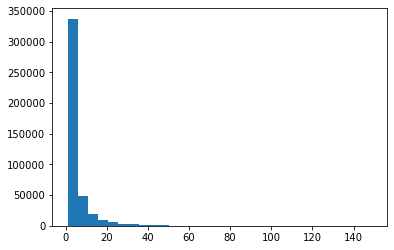

In [159]:
plt.hist(y_train, bins = 30)

In [193]:
 {'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}
mod_RF = RandomForestRegressor(max_features = 'auto', min_samples_split = 2, 
                               n_estimators = 1200, min_samples_leaf = 4,
                               max_depth = 100, bootstrap = True, n_jobs = -1,
                              random_state=42)
mod_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [194]:
mod_RF.score(X_test, y_test)

0.7917753985832848

In [195]:
y_pred = mod_RF.predict(X_test)
y_pred_plt = mod_RF.predict(X_plt2)

In [163]:
#Use if doing a transform on y
#y_t = qt.inverse_transform(y_test)
#y_p = qt.inverse_transform(y_pred.reshape(-1,1))

In [196]:
(mean_squared_error(y_test,y_pred))**.5

3.2663893584081047

(array([1.61033e+05, 1.49100e+04, 5.00600e+03, 2.24500e+03, 1.06000e+03,
        4.30000e+02, 2.07000e+02, 8.40000e+01, 3.50000e+01, 1.60000e+01]),
 array([ 1.00025   ,  8.77909523, 16.55794046, 24.3367857 , 32.11563093,
        39.89447616, 47.67332139, 55.45216662, 63.23101185, 71.00985709,
        78.78870232]),
 <a list of 10 Patch objects>)

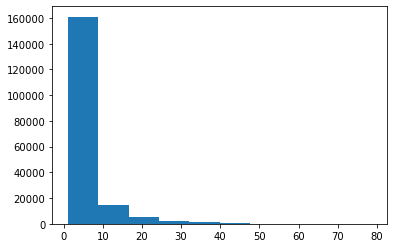

In [165]:
plt.hist(y_pred)

In [166]:
mean_absolute_error(y_test, y_pred)

1.6407566769169328

Text(0, 0.5, 'Predicted')

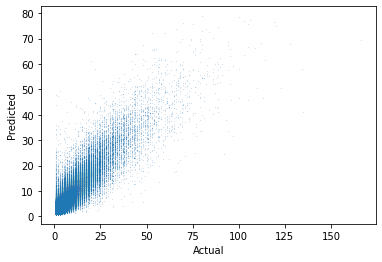

In [170]:
plt.scatter(y_test,y_pred, s=.005)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [197]:
NB = BayesianRidge(alpha_1=.01,alpha_2=100)
NB.fit(X_train,y_train)

BayesianRidge(alpha_1=0.01, alpha_2=100, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [198]:
NB.score(X_test,y_test)

0.1638510456792608

In [735]:
y_pred = NB.predict(X_test)
y_pred_plt = NB.predict(X_plt)

In [736]:
#Use if doing a transform on y
y_t = qt.inverse_transform(y_test)
y_p = qt.inverse_transform(y_pred.reshape(-1,1))

In [737]:
(mean_squared_error(y_t,y_p))**.5

7.252160886322773

In [597]:
Importance = pd.DataFrame({'RF Import':mod_RF.feature_importances_*100},
                         index = X.columns)
Import_df =Importance.sort_values('RF Import', ascending=False) # Display Top 15

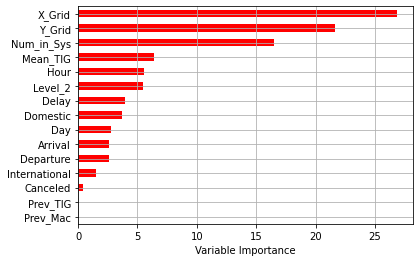

In [598]:
Import_df.plot.barh(color='r').invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

### Linear Regression

In [205]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
LR.score(X_test, y_test)

0.16377933136108125

In [207]:
(mean_squared_error(y_test, LR.predict(X_test)))**.5

6.5457947154786185

Text(0, 0.5, 'Predicted')

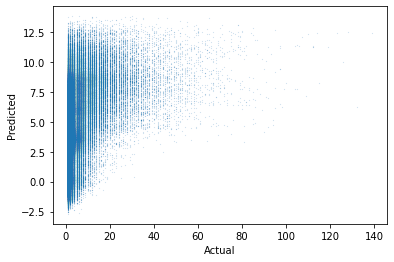

In [216]:
plt.scatter(y_test,LR.predict(X_test), s=.005)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Bayesian Ridge

In [190]:
NB = BayesianRidge(alpha_1=.01,alpha_2=100)
NB.fit(X_train,y_train)

BayesianRidge(alpha_1=0.01, alpha_2=100, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [191]:
NB.score(X_test, y_test)

0.1638510456792608

In [192]:
(mean_squared_error(y_test, NB.predict(X_test)))**.5

6.545514025651444

Text(0, 0.5, 'Predicted')

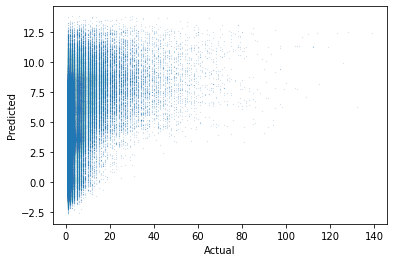

In [217]:
plt.scatter(y_test,NB.predict(X_test), s=.005)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Ada Boost

In [211]:
AB = AdaBoostRegressor(n_estimators=600, learning_rate=.05,random_state=0)
AB.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=600, random_state=0)

In [212]:
AB.score(X_test, y_test)

-0.2116297068996944

In [214]:
(mean_squared_error(y_test, AB.predict(X_test)))**.5

7.879286437111401

Text(0, 0.5, 'Predicted')

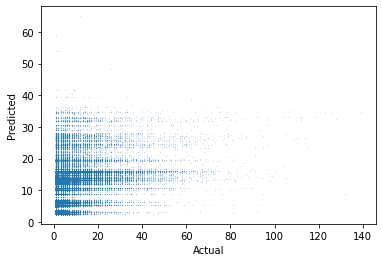

In [218]:
plt.scatter(y_test,AB.predict(X_test), s=.005)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [215]:
Importance = pd.DataFrame({'AB Import':AB.feature_importances_*100},
                         index = X.columns)
Import_df['Ab Import'] =Importance.sort_values('AB Import', ascending=False)[:5] # Display Top 10

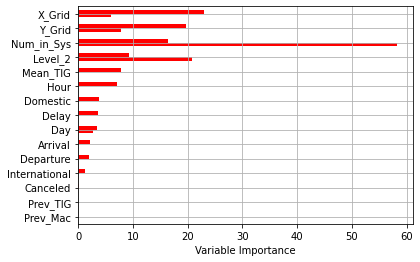

In [178]:
Import_df.plot.barh(color='r').invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

### XGBoost

In [208]:
XGB = XGBRegressor(n_estimators=600, learning_rate=.06,random_state=42,objective ='reg:squarederror')
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [209]:
XGB.score(X_train, y_train)

0.38380896847367396

In [210]:
mean_squared_error(y_test,XGB.predict(X_test))

31.946259907214863

Text(0, 0.5, 'Predicted')

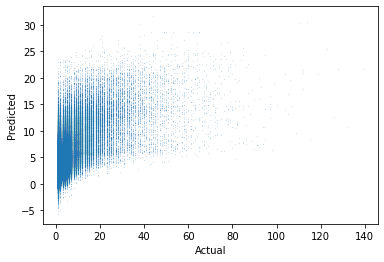

In [219]:
plt.scatter(y_test,XGB.predict(X_test), s=.005)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### KNN

In [202]:
KNN = KNeighborsRegressor()

In [203]:
KNN.fit(X_train, y_train) # Takes awhile

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [204]:
y_pred = KNN.predict(X_test)
mean_squared_error(y_test,y_pred)

21.651318625490465

## Grid Search!

In [59]:
'''# Stole this - Makes random parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)
'''

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [57]:
param_grid =  {'n_estimators': [1200],
               'min_samples_split': [2],
               'min_samples_leaf': [4],
               'max_features': ['auto'],
               'max_depth': [100],
               'bootstrap': [True]}

In [58]:
#pipe = Pipeline([('RF', RandomForestRegressor())])
RF = RandomForestRegressor()
grid_RF = RandomizedSearchCV(estimator = RF, param_distributions = param_grid, 
                         n_iter = 1, cv = 5, verbose=2, random_state=42, n_jobs = -1)
grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 66.4min remaining: 99.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 66.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 66.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
grid_RF.best_params_

In [ ]:
'''Results
{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}
 
 # Round 2
 {'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}
'''

In [59]:
grid_RF.score(X_test, y_test)

0.8088725148781474

In [60]:
y_pred = grid_RF.predict(X_test)
y_pred_plt = grid_RF.predict(X_plt2)

In [241]:
y_pred_plt[:10]

array([1.99616695, 2.70685899, 2.08794838, 2.1570148 , 1.47710586,
       1.22302227, 1.8451945 , 1.88017979, 1.55741724, 2.74412106])

In [61]:
(mean_squared_error(y_test, y_pred))**.5

3.1327209823359836

(array([1.24141e+05, 2.68540e+04, 1.12760e+04, 6.89700e+03, 4.53900e+03,
        2.97200e+03, 2.10200e+03, 1.49400e+03, 1.09300e+03, 8.26000e+02,
        6.87000e+02, 5.58000e+02, 4.13000e+02, 2.81000e+02, 2.33000e+02,
        1.82000e+02, 1.21000e+02, 9.40000e+01, 7.70000e+01, 4.50000e+01,
        3.70000e+01, 4.10000e+01, 1.30000e+01, 1.30000e+01, 1.20000e+01,
        8.00000e+00, 1.00000e+01, 5.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 1.00011905,  3.720717  ,  6.44131495,  9.16191291, 11.88251086,
        14.60310882, 17.32370677, 20.04430472, 22.76490268, 25.48550063,
        28.20609858, 30.92669654, 33.64729449, 36.36789244, 39.0884904 ,
        41.80908835, 44.5296863 , 47.25028426, 49.97088221, 52.69148016,
        55.41207812, 58.13267607, 60.85327402, 63.57387198, 66.29446993,
        69.01506788, 71.73566584, 74.45626379, 77.17686175, 79.8974597 ,
        82.61805765]),
 <a list of 30 Patch objects>)

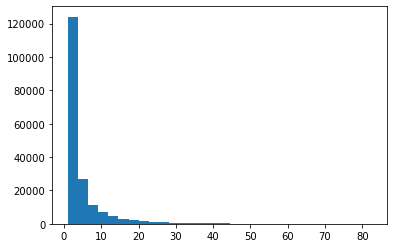

In [62]:
plt.hist(y_pred, bins=30)

Text(0, 0.5, 'Predicted')

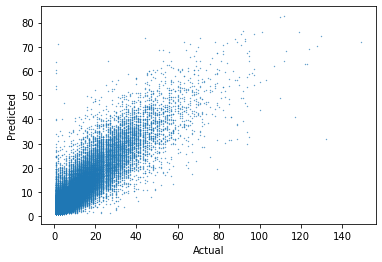

In [63]:
plt.scatter(y_test,y_pred, s = .1)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [64]:
Importance = pd.DataFrame({'RF Import':grid_RF.best_estimator_.feature_importances_*100},
                         index = X.columns)
Import_df =Importance.sort_values('RF Import', ascending=False) # Display Top 15

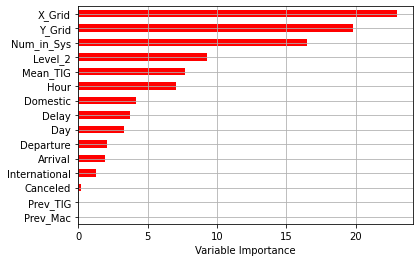

In [65]:
Import_df.plot.barh(color='r').invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

##  Use This to Create the DF For Animation

In [66]:
df_plot = pd.DataFrame()

df_plot = X_plt
df_plot['act'] = y_plt
df_plot['pred'] = y_pred_plt
df_plot['over'] = df_plot['act'] - (df_plot['pred'])
df_plot.loc[df_plot.over < 20, 'over'] = 0

In [72]:
len(df_plot)

9901

In [71]:
df_plot.over.value_counts()

0.000000     9801
25.642124       1
33.427363       1
37.281551       1
35.317392       1
             ... 
37.043735       1
20.895312       1
22.216994       1
21.562899       1
25.185447       1
Name: over, Length: 101, dtype: int64

In [73]:
df_plot2 = df_plot[['X_Grid', 'Y_Grid', 'Hour', 'over', 'Level_2']]
df_plot2.columns = ['grid_x','grid_y','time','count', 'Level_2']

In [74]:
max(df_plot2['count'])

74.23540444049667

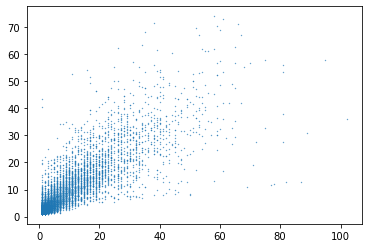

In [75]:
plt.scatter(y_plt,y_pred_plt, s = .1)

In [76]:
df_plot2.to_csv('pred_for_plot3.csv')